# Capstone Project 1 - Subscription for Bank Deposits 

**Problem**: Companies spend tremendous amounts of money on marketing in order to drive sales, but not all investments bring results. Even with the significant advancements in the ability to target the prospective customers, the targeting of the marketing campaigns is still not very precise and substantial amounts of money are still spent on marketing to the wrong audience. At the same time, the companies are now collecting more data about their customers than ever, which gives an opportunity to use that data for better targeting and profit growth.

Telemarketing remains one of the most popular marketing vehicles. The customers are usually categorized by the age group, gender, level of income and so on. Based on this preliminary targeting, telemarketers “cold call” potential customers and try to filter out those who may be interested in the product. Naturally, a lot of telemarketers’ time is wasted on calling people who have no interest in what they offer. A better targeting, hence, presents a significant opportunity to increase the effect of the telemarketing campaigns.


**Client**: Though this analysis is focused on identifying the customers who are the most likely to subscribe for bank deposits, the classification approach employed in this project can be used by any company that uses telemarketing. Better prospective customer classification will allow companies to more effectively use their telemarketers’ time and get more return on their marketing investment.


**Data**: The data for this project are sourced from the UCI Machine Learning repository and represents the results of direct marketing campaigns (phone calls) of a Portuguese banking institution. The data set has 45,211 instances and 20 features (input variables), stored in a .csv file.

http://archive.ics.uci.edu/ml/datasets/Bank+Marketing


**Method**: The expected result of the project is to predict if a customer subscribes for a deposit offer or will eventually decline it. Hence, a number of classification methods will be used, including Logistic Regression and Decision Trees.

**Deliverables**: The outcome of the project will be presented in a form of Jupyter notebook, as well as the PowerPoint presentation.

### General Information on the Data

**Overview**: The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

This dataset is based on "Bank Marketing" UCI dataset (http://archive.ics.uci.edu/ml/datasets/Bank+Marketing). The data are enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb. The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

**Number of Instances**: 41188

**Number of Attributes**: 20+ output attributes

[Detailed description of data](Data_description.txt)

## Step 1 - Exploratory Data Analysis

**Loading required libraries and the dataset**

In [49]:
#Pandas for dataframes
import pandas as pd
#Changing default display option to display all columns
pd.set_option('display.max_columns', 21)

#Numpy for numerical computing
import numpy as np

#Matplotlib for visualization
import matplotlib.pyplot as plt

#Display plots in the notebook
%matplotlib inline 

#Seaborn for easier visualization
import seaborn as sns

from scipy import stats

df = pd.read_csv('Data/Raw_data/bank-additional-full.csv', sep=';')

**Parameters of the dataset**

Let's look at the overall characteristics of the dataset, starting with the dataset shape, number and types of variables, and the overall distribution of the numerical variables. Before doing the analysis, let's drop the duplicates from the dataset.

In [2]:
#Dropping the duplicates
df = df.drop_duplicates()

#Dataframe dimensions
df.shape

(41176, 21)

By dropping the duplicates, we lost 12 observations out of 41,188, which is very little. Let's look at the data types and missing values:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age               41176 non-null int64
job               41176 non-null object
marital           41176 non-null object
education         41176 non-null object
default           41176 non-null object
housing           41176 non-null object
loan              41176 non-null object
contact           41176 non-null object
month             41176 non-null object
day_of_week       41176 non-null object
duration          41176 non-null int64
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null object
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

We have 21 variables (10 numeric and 11 string) and 41,176 non-duplicate rows. There are no missing values. All string variables are categorical, so they need to be converted accordingly.

In [4]:
#Selecting categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

#Looping through the columns and changing type to 'category'
for column in categorical_columns:
    df[column] = df[column].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age               41176 non-null int64
job               41176 non-null category
marital           41176 non-null category
education         41176 non-null category
default           41176 non-null category
housing           41176 non-null category
loan              41176 non-null category
contact           41176 non-null category
month             41176 non-null category
day_of_week       41176 non-null category
duration          41176 non-null int64
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null category
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null category
dtypes: category(11), float64

Let's look at the first 10 and last 10 rows of data to see how the data look and check if there are any corrupted data:

In [5]:
#First 10 rows
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
#Last 10 rows
df.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,483,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,151,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,254,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,112,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


There are no obvious signs of inconsistency or corrupted data. 


### Categorical Data

Let's look at the distribution of the categorical data:

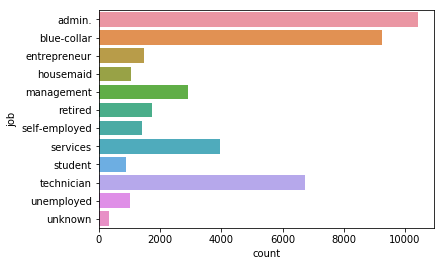

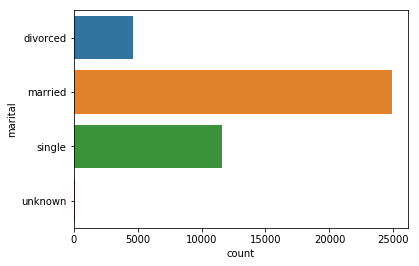

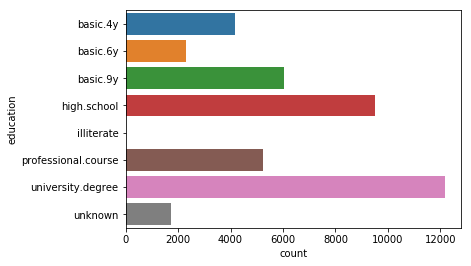

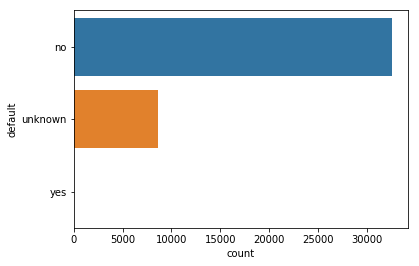

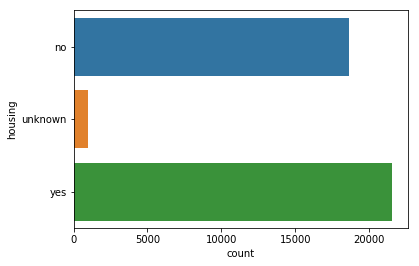

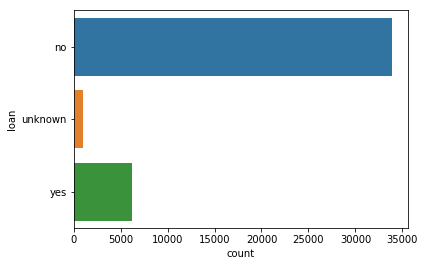

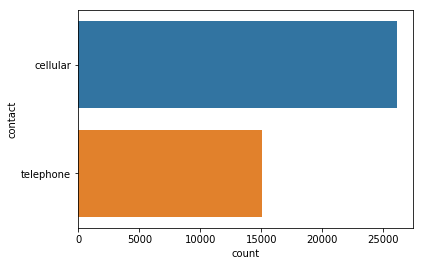

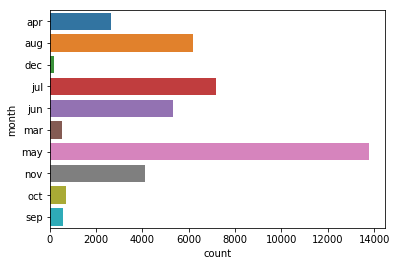

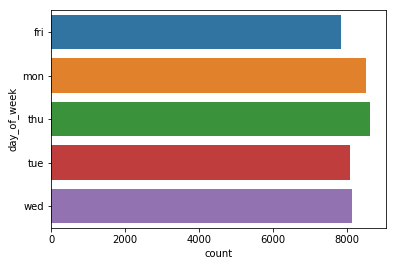

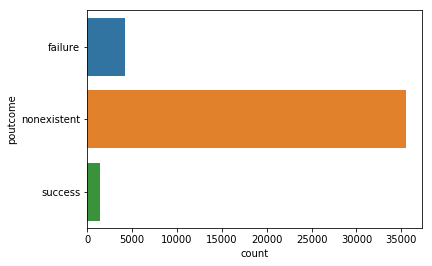

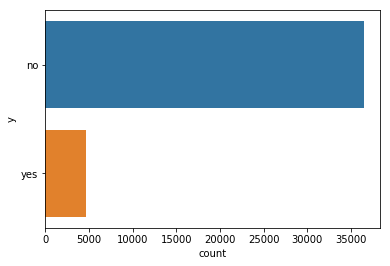

In [7]:
#Bar plots of categorical features
for feature in df.dtypes[df.dtypes == 'category'].index:
    sns.countplot(y=feature, data=df)
    plt.show()

The data don't show any unusual dynamic. There are some sparse or similar classes, which can be combined into a single category to simplify the prediction models. For example, the 'enterpreneur' and 'self-employed' categories of the 'job' variable, as well as 'retired' and 'unemployed' categories, can be combined into one. Additionally, the 'divorced' and 'single' categories of the 'marital' variable can be combined under one 'single' category. A similar consolidation can be performed for the basic education levels of the 'education' variable.

Let's now look at the number of entries per each level of the categorical variables as proportion of the overall number of entries:

In [8]:
#Type of job as proportion of the overall number of values
df.job.value_counts()/df.job.count()

admin.           0.253036
blue-collar      0.224718
technician       0.163663
services         0.096343
management       0.071012
retired          0.041723
entrepreneur     0.035360
self-employed    0.034510
housemaid        0.025743
unemployed       0.024626
student          0.021250
unknown          0.008014
Name: job, dtype: float64

The list of the types of jobs doesn't look too comprehensive. Moreover, about 63% of all types of jobs in the dataset belong to just 3 categories - admin, blue-collar and technician. In general, the limited number of the types of jobs may limit the predictive power of this variable. There is a small proportion of unknown job types, which can be dropped from the dataset.

In [9]:
#Marital status as proportion of the overall number of values
df.marital.value_counts()/df.marital.count()

married     0.605231
single      0.280843
divorced    0.111983
unknown     0.001943
Name: marital, dtype: float64

About 88% of all targeted individuals are married or single. There is a small proportion of people with unknown marital status, which can be dropped from the dataset. In general, the distribution of this variable is relatively balanced between the married and single individuals.

In [10]:
#Education as proportion of the overall number of values
df.education.value_counts()/df.education.count()

university.degree      0.295415
high.school            0.231008
basic.9y               0.146809
professional.course    0.127259
basic.4y               0.101418
basic.6y               0.055639
unknown                0.042015
illiterate             0.000437
Name: education, dtype: float64

More than 50% of targeted individuals have a university degree or a high school diploma. There is a relatively small number of respondents with an unknown education level, as well as illiterate ones, which can be dropped from the dataset.

In [11]:
#Past defaults on a credit as proportion of the overall number of values
df.default.value_counts()/df.default.count()

no         0.791165
unknown    0.208762
yes        0.000073
Name: default, dtype: float64

There is a very small number of respondents who defaulted on a credit, so this variable doesn't look very informative for prediction purposes and can be dropped from the dataset.

In [12]:
#Respondents with house loans as proportion of the overall number of values
df.housing.value_counts()/df.housing.count()

yes        0.523873
no         0.452084
unknown    0.024043
Name: housing, dtype: float64

There is an almost even split between the respondents that have a house loan and that don't, which makes this variable a well-balanced potential predictor.

In [13]:
#Respondents with personal loans as proportion of the overall number of values
df.loan.value_counts()/df.loan.count()

no         0.824218
yes        0.151739
unknown    0.024043
Name: loan, dtype: float64

Most of the respondents don't have a personal loan. There is a relatively small number of respondents with unknown loan status, which can be dropped from the dataset.

In [14]:
#Contact communication type as proportion of the overall number of values
df.contact.value_counts()/df.contact.count()

cellular     0.634714
telephone    0.365286
Name: contact, dtype: float64

More than 63% of all respondents were contacted via cellular phone. There are no entries with unknown type of communication.

In [15]:
#Last contact month as proportion of the overall number of values
df.month.value_counts()/df.month.count()

may    0.334345
jul    0.174106
aug    0.149990
jun    0.129153
nov    0.099573
apr    0.063896
oct    0.017413
sep    0.013843
mar    0.013260
dec    0.004420
Name: month, dtype: float64

Most of the respondents were contacted during the summer months, with more than 30% of all contacts happening in May. The month of the contact can have a substantial impact on the desire to subscribe for a deposit (e.g., many people may be receiving salary bonuses at the end of the calendar year, which could be a good time to contact them about the deposit). This skewness of the previous campaigns' efforts towards summer may significantly impact the outcomes of the campaigns.

In [16]:
#Last contact day as proportion of the overall number of values
df.day_of_week.value_counts()/df.day_of_week.count()

thu    0.209297
mon    0.206722
wed    0.197542
tue    0.196377
fri    0.190062
Name: day_of_week, dtype: float64

The days of the work week of the previous contact are distributed almost evenly, so there is no obvious skewness towards a particular day or days. It would be interesting to check if some days are more effective for telemarketing campaigns and if the resources of the telemarketers should be re-distributed. We'll check this separately.

In [17]:
#Outcome of the previous campaign as proportion of the overall number of values
df.poutcome.value_counts()/df.poutcome.count()

nonexistent    0.863391
failure        0.103264
success        0.033345
Name: poutcome, dtype: float64

More than 86% of respondents were never covered by the previous marketing campaigns. Hence, it may make sense to divide the respondents into new customers (with 'nonexistent' status) and existing customers ('failure' or 'success' status). Within the existing customers' subset, it may be interesting to look at the predictors of the campaign success for the previously failed and successful campaigns separately - the existing customers may be more willing to open a deposit than someone who never heard of the bank before.

In [18]:
#Outcome of the current campaign as proportion of the overall number of values
df.y.value_counts()/df.y.count()

no     0.887337
yes    0.112663
Name: y, dtype: float64

Only ~11% of the respondents to the current campaign have actually subscribed for a deposit, which makes the overall dataset highly imbalanced and requires application of special methods to compensate for it. 

### Numerical Data

Next, let's look at the distributions of the numerical variables:

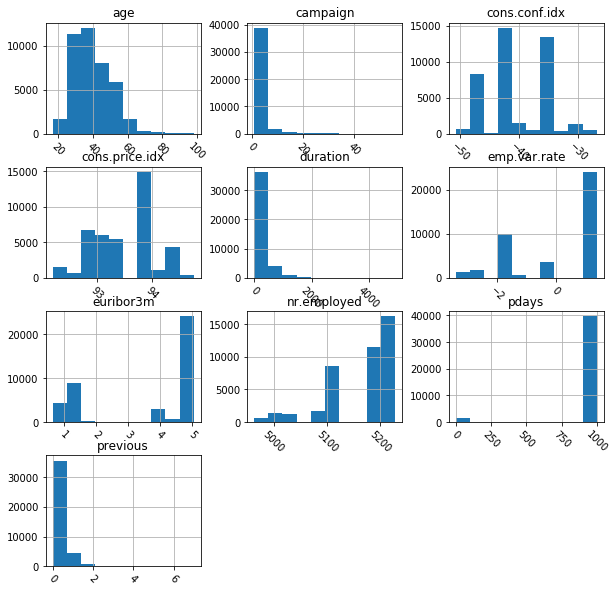

In [19]:
# Histogram grid
df.hist(figsize=(10,10), xrot=-45)

# Clear the text "residue"
plt.show()

In [20]:
#Summary of numeric features
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


There are no obvious errors in the data. There are some prominent peaks in the distributions of the economic indicators, but it's not clear what was causing those peaks. There is a high likelihood that those variables will not have high predictive power for our target variable.

The number of days since the previous campaign is highly skewed because the number of days for the respondents not contacted previously are stated as 999. This variable should be transformed (e.g., the new and existing customers should be separated into different categories) to become more informative. The variables 'campaign' and 'previous' are heavily skewed towards zero, since the majority of the respondents were never contacted with the campaign before. The variable 'duration' should be dropped before we start building any predictive models, as mentioned before.

## Data Cleaning and Feature Engineering

To prepare the dataset for building a predictive model, we'll remove the uknown values, reduntant variables and combine the sparse classes into more general categories. Let's start with dropping the 'unknown' levels and redundant variables:

In [21]:
df_cleaned = df

#Dropping the unknown job level
df_cleaned = df_cleaned[df_cleaned.job != 'unknown']

#Dropping the unknown marital status
df_cleaned = df_cleaned[df_cleaned.marital != 'unknown']

#Dropping the unknown and illiterate education level
df_cleaned = df_cleaned[df_cleaned.education != 'unknown']
df_cleaned = df_cleaned[df_cleaned.education != 'illiterate']

#Deleting the 'default' column
del df_cleaned['default']

#Deleting the 'duration' column
del df_cleaned['duration']

#Dropping the unknown housing loan status
df_cleaned = df_cleaned[df_cleaned.housing != 'unknown']

#Dropping the unknown personal loan status
df_cleaned = df_cleaned[df_cleaned.loan != 'unknown']

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38216 entries, 0 to 41187
Data columns (total 19 columns):
age               38216 non-null int64
job               38216 non-null category
marital           38216 non-null category
education         38216 non-null category
housing           38216 non-null category
loan              38216 non-null category
contact           38216 non-null category
month             38216 non-null category
day_of_week       38216 non-null category
campaign          38216 non-null int64
pdays             38216 non-null int64
previous          38216 non-null int64
poutcome          38216 non-null category
emp.var.rate      38216 non-null float64
cons.price.idx    38216 non-null float64
cons.conf.idx     38216 non-null float64
euribor3m         38216 non-null float64
nr.employed       38216 non-null float64
y                 38216 non-null category
dtypes: category(10), float64(5), int64(4)
memory usage: 3.3 MB


Next, let's combine sparse categories:

In [22]:
#Combining entrepreneurs and self-employed into self-employed
df_cleaned.job.replace(['entrepreneur', 'self-employed'], 'self-employed', inplace=True)

#Combining administrative and management jobs into admin_management
df_cleaned.job.replace(['admin.', 'management'], 'administration_management', inplace=True)

#Combining blue-collar and tecnician jobs into blue-collar
df_cleaned.job.replace(['blue-collar', 'technician'], 'blue-collar', inplace=True)

#Combining retired and unemployed into no_active_income
df_cleaned.job.replace(['retired', 'unemployed'], 'no_active_income', inplace=True)

#Combining services and housemaid into services
df_cleaned.job.replace(['services', 'housemaid'], 'services', inplace=True)

#Combining single and divorced into single
df_cleaned.marital.replace(['single', 'divorced'], 'single', inplace=True)

#Combining basic school degrees
df_cleaned.education.replace(['basic.9y', 'basic.6y', 'basic.4y'], 'basic_school', inplace=True)

We have 2 variables that define if a respondent is a new or existing customer - 'poutcome' (previously contacted by a marketing campaign) and 'pdays' (days since previous marketing contact). For the new customer, 'poutcome' would have a value of 'nonexistent' and 'pdays' would have a value of '999'. Let's see if we have the same number of respondents for each of these levels:

In [23]:
#Comparing number of entries for 'poutcome' and 'pdays'
a = df_cleaned.poutcome.value_counts()
b = df_cleaned.pdays.value_counts()
print(a['nonexistent'], b[999])

33039 36851


The numbers vary significantly, while logically they should be the same. Let's check another variable, 'previous', which contains the number of customer contacts performed before the current campaign. A zero value would indicate the new customers.

In [24]:
c = df_cleaned.previous.value_counts()
print(c[0])

33039


The number of new customers in 'previous' matches the 'poutcome' variable exactly. Now, let's check if the 'pdays' variable has the '999' value for any levels of the 'poutcome' variable other than 'nonexistent':

In [25]:
#Filtering the 'poutcome' and 'pdays' variables
not_matching = df_cleaned.loc[( (df_cleaned['pdays'] == 999) & (df['poutcome'] != 'nonexistent') )]

#Counting the values
not_matching.poutcome.value_counts()

failure        3812
success           0
nonexistent       0
Name: poutcome, dtype: int64

This is exactly the difference in the counts of values between the variables 'poutcome' and 'pdays', so it looks like 3,812 entries of the variable 'pdays' are mistakenly labeled with '999'. Now, let's check if the distributions of several other numeric variables are similar for the 'failure' category of the 'poutcome' variable to decide how to deal with these 3,812 entries:

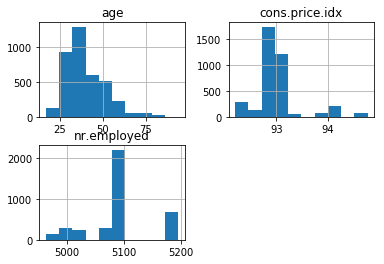

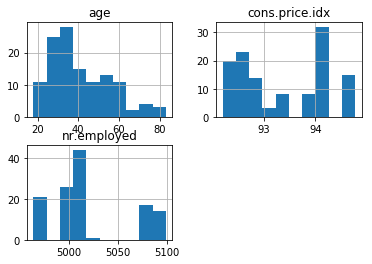

In [26]:
#Filtering for the rows that have 'poutcome' equal to 'failure' and 'pdays' equal to '999'
fail_999 = df_cleaned.loc[( (df_cleaned['pdays'] == 999) & (df['poutcome'] == 'failure') )]

#Filtering for 'age' and 'nr.employed' columns only
fail_999 = fail_999.loc[:, ['age', 'nr.employed', 'cons.price.idx']]

#Filtering for the rows that have 'poutcome' equal to 'failure' and 'pdays' NOT equal to '999'
fail_no999 = df_cleaned.loc[( (df_cleaned['pdays'] != 999) & (df['poutcome'] == 'failure') )]

#Filtering for 'age', 'nr.employed' and 'cons.price.idx' columns only
fail_no999 = fail_no999.loc[:, ['age', 'nr.employed', 'cons.price.idx']]

#Plotting histograms
fail_999.hist()
fail_no999.hist()
plt.show()

Variable 'age' seems to be distributed roughly equally for both '999' and non-'999' marked levels of 'poutcome', but the distributions of 'nr.employed' and 'cons.price.idx' differ substantially. Taking that into consideration, we will consider the 'pdays' level of '999' for the rows that have 'poutcome' level of 'failure' to be missing variables. Let's label them as such:

In [27]:
#Getting the positions of the mistakenly labeled 'pdays'
ind_999 = df_cleaned.loc[(df_cleaned['pdays'] == 999) & (df['poutcome'] != 'nonexistent')]['pdays'].index.values

#Assigning NaNs instead of '999'
df_cleaned.loc[ind_999, 'pdays'] = np.nan

#Checking if the NaNs were assigned correctly
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38216 entries, 0 to 41187
Data columns (total 19 columns):
age               38216 non-null int64
job               38216 non-null object
marital           38216 non-null category
education         38216 non-null object
housing           38216 non-null category
loan              38216 non-null category
contact           38216 non-null category
month             38216 non-null category
day_of_week       38216 non-null category
campaign          38216 non-null int64
pdays             34404 non-null float64
previous          38216 non-null int64
poutcome          38216 non-null category
emp.var.rate      38216 non-null float64
cons.price.idx    38216 non-null float64
cons.conf.idx     38216 non-null float64
euribor3m         38216 non-null float64
nr.employed       38216 non-null float64
y                 38216 non-null category
dtypes: category(8), float64(6), int64(3), object(2)
memory usage: 5.0+ MB


Exactly 3,812 instances of 'pdays' are labeled as NaN, which was the goal. Since it's ~10% of data, we can drop the missing values for now, as the remaining data will suffice to do further analysis.

In [28]:
#Dropping NAs from the dataset
df_cleaned = df_cleaned.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34404 entries, 0 to 41186
Data columns (total 19 columns):
age               34404 non-null int64
job               34404 non-null object
marital           34404 non-null category
education         34404 non-null object
housing           34404 non-null category
loan              34404 non-null category
contact           34404 non-null category
month             34404 non-null category
day_of_week       34404 non-null category
campaign          34404 non-null int64
pdays             34404 non-null float64
previous          34404 non-null int64
poutcome          34404 non-null category
emp.var.rate      34404 non-null float64
cons.price.idx    34404 non-null float64
cons.conf.idx     34404 non-null float64
euribor3m         34404 non-null float64
nr.employed       34404 non-null float64
y                 34404 non-null category
dtypes: category(8), float64(6), int64(3), object(2)
memory usage: 3.4+ MB


## Statistical analysis

First, let's look at how the numeric variables in the dataset correlate:

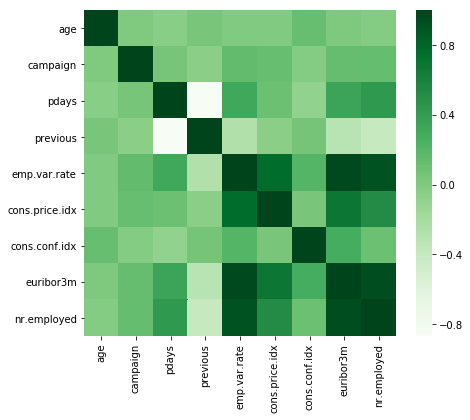

In [58]:
#Calculate correlations between numeric features
correlations = df_cleaned.corr()
#Make the figsize 7 x 6
plt.figure(figsize=(7,6))
#Plot heatmap of correlations
_ = sns.heatmap(correlations, cmap="Greens")

As can be seen, the economic indicators strongly correlate with each other. Additionally, the 'previous' and 'pdays' variables have a strong negative correlation, as expected, since the largest value of 'pdays' (999) corresponds to the smallest value of 'previous' (0).

If the strong correlation between the above variables is statistically significant, we may group or drop some of them, as having multiple strongly correlated variables in our prediction model will not substantially increase the accuracy of our model.

Let's test the statistical significance of the strongly correlated variables representing the state of economy, i.e. of the below pairs using permutation:

- 'emp.var.rate' - 'cons.price.idx'
- 'emp.var.rate' - 'euribor3m'
- 'emp.var.rate' - 'nr.employed'
- 'cons.price.idx' - 'euribor3m'
- 'cons.price.idx' - 'nr.employed'
- 'euribor3m' - 'nr.employed'

In [30]:
#Defining the permutation function
def perm_sample(data):

    #Doing the permutation
    perm_data = np.random.permutation(data)

    return perm_data

#Defining a function to generate permuted correlation coefficients
def calculate_perm_corr(data1, data2, size=1):

    #Empty array
    perm_replicates = np.empty(size)

    for i in range(size):
        #Generating permutation samples
        perm_data1 = perm_sample(data1)
        perm_data2 =  perm_sample(data2)

        #Calculating the desired function
        perm_replicates[i] = np.corrcoef(perm_data1, perm_data2)[0,1]

    return perm_replicates

#Saving 'emp.var.rate' and 'cons.price.idx' as separate variables
emp_var = df_cleaned['emp.var.rate']
cons_price = df_cleaned['cons.price.idx'] 

#Calculating the correlation coefficient
r_emp_var_cons_price = np.corrcoef(emp_var, cons_price)[0,1]
r_emp_var_cons_price

0.7652591232433003

In [31]:
#Calculating the permuted coefficients for 'emp.var.rate' and 'cons.price.idx'
permuted_corr_coef = calculate_perm_corr(emp_var, cons_price, size=10000)

#Calculating the p-value for 'emp.var.rate' and 'cons.price.idx'
p = np.sum(permuted_corr_coef >= r_emp_var_cons_price) / len(permuted_corr_coef)
p

0.0

In [32]:
#Saving 'euribor3m' as a separate variable
euribor = df_cleaned['euribor3m'] 

#Calculating the correlation coefficient for 'emp.var.rate' and 'euribor3m'
r_emp_var_euribor = np.corrcoef(emp_var, euribor)[0,1]
r_emp_var_euribor

0.9732670197033407

In [33]:
#Calculating the permuted coefficients for 'emp.var.rate' and 'euribor3m'
permuted_corr_coef = calculate_perm_corr(emp_var, euribor, size=10000)

#Calculating the p-value for 'emp.var.rate' and 'euribor3m'
p = np.sum(permuted_corr_coef >= r_emp_var_euribor) / len(permuted_corr_coef)
p

0.0

In [34]:
#Saving 'nr.employed' as a separate variable
nr_empl = df_cleaned['nr.employed'] 

#Calculating the correlation coefficient for 'emp.var.rate' and 'nr.employed'
r_emp_var_nr_empl = np.corrcoef(emp_var, nr_empl)[0,1]
r_emp_var_nr_empl

0.9113382084966004

In [35]:
#Calculating the permuted coefficients for 'emp.var.rate' and 'nr.employed'
permuted_corr_coef = calculate_perm_corr(emp_var, nr_empl, size=10000)

#Calculating the p-value for 'emp.var.rate' and 'nr.employed'
p = np.sum(permuted_corr_coef >= r_emp_var_nr_empl) / len(permuted_corr_coef)
p

0.0

In [36]:
#Calculating the correlation coefficient for 'cons.price.idx' and 'euribor3m'
r_cons_price_euribor = np.corrcoef(cons_price, euribor)[0,1]
r_cons_price_euribor

0.6850609962404373

In [37]:
#Calculating the permuted coefficients for 'cons.price.idx' and 'euribor3m'
permuted_corr_coef = calculate_perm_corr(cons_price, euribor, size=10000)

#Calculating the p-value for 'cons.price.idx' and 'euribor3m'
p = np.sum(permuted_corr_coef >= r_cons_price_euribor) / len(permuted_corr_coef)
p

0.0

In [38]:
#Calculating the correlation coefficient for 'cons.price.idx' and 'nr.employed'
r_cons_price_nr_empl = np.corrcoef(cons_price, nr_empl)[0,1]
r_cons_price_nr_empl

0.5277824481564879

In [39]:
#Calculating the permuted coefficients for 'cons.price.idx' and 'nr.employed'
permuted_corr_coef = calculate_perm_corr(cons_price, nr_empl, size=10000)

#Calculating the p-value for 'cons.price.idx' and 'nr.employed'
p = np.sum(permuted_corr_coef >= r_cons_price_nr_empl) / len(permuted_corr_coef)
p

0.0

In [40]:
#Calculating the correlation coefficient for 'euribor3m' and 'nr.employed'
r_euribor_nr_empl = np.corrcoef(euribor, nr_empl)[0,1]
r_euribor_nr_empl

0.9454369495735588

In [41]:
#Calculating the permuted coefficients for 'euribor3m' and 'nr.employed'
permuted_corr_coef = calculate_perm_corr(euribor, nr_empl, size=10000)

#Calculating the p-value for 'euribor3m' and 'nr.employed'
p = np.sum(permuted_corr_coef >= r_euribor_nr_empl) / len(permuted_corr_coef)
p

0.0

As can be seen, all correlations of the above pairs are statistically significant, since the p-values are very close to zero. Hence, we can potentially combine them into one variable that will represent the state of the economy.

Let's look at the mean age of the dataset and use bootstrapping to see if this mean is significantly different from the mean of the sampling distributin of means drawn from 10,000 bootstrap replicates:

In [42]:
#Calculating the mean age of our dataset
mean_age = np.mean(df_cleaned['age'])
mean_age

39.85803976281828

In [43]:
#Defining function to draw bootstrap replicates
def draw_bs_reps(data, func, size=1):
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

#Setting random seed
np.random.seed(42)

#Generating 10000 bootstrap replicates with the shifted data
bs_replicates = draw_bs_reps(df_cleaned['age'], np.mean, size=10000)

#Calculating the p-value for the dataset mean 
p = np.sum(bs_replicates >= mean_age) / len(bs_replicates)
p

0.4987

As we can see, the mean of our dataset is very close to the mean of the sampling distribution of the bootstrapped samples' means, so our dataset represents the overall population well, and there's no skew towards any particular age.

Now, let's check if our categorical variables are independent of each other using a chi-square test with a 95% level of confidence. We will need to check the following pairs (it doesn't make much sense to do a chi-square test for days of the week or months, and the dependence/independence of the outcome of the previous campaign should be checked by a more comprehensive method, like logistic regression).

- 'job' - 'marital'
- 'job' - 'education'
- 'job' - 'housing'
- 'job' - 'loan'
- 'job' - 'contact'
- 'marital' - 'education'
- 'marital' - 'housing'
- 'marital' - 'loan'
- 'marital' - 'contact'
- 'education' - 'housing'
- 'education' - 'loan'
- 'education' - 'contact'
- 'housing' - 'loan'
- 'housing' - 'contact'
- 'loan' - 'contact'  

To use chi-square test, our dataset must meet the following criteria:

- Sampled observations must be independent
- Random sampling/assignment should be used
- If sampling without replacement, the data should be <10% of population
- Each category should contribute to only one cell in the contingency table
- Each particular scenario (i.e. cell) should have at least 5 expected cases

In the dataset description, there's no information on how the data were collected, so we can only assume that the observations are independent and that the random sampling was used. We will also assume that each category contributes to only one cell in the contingency table. Our dataset is definitely less than 10% of population. Last, we will see if there are scenarios with less than 5 cases.

Our null-hypothesis for each pair will be that the variables are independent from each other. The high chi-squared value or low p-value will allow us to reject this null-hypothesis and conclude that the variables are dependent.

In [51]:
#Creating the contingency table for comparing 'job' and 'education'
contingency_table = pd.crosstab(index=df_cleaned['job'], columns=df_cleaned['education'], margins=True)
contingency_table

education,basic_school,high.school,professional.course,university.degree,All
job,,,,,
administration_management,956,3142,384,6890,11372
blue-collar,6961,1530,3365,1683,13539
no_active_income,984,470,336,469,2259
self-employed,669,300,258,1201,2428
services,1235,2463,250,274,4222
student,116,289,33,146,584
All,10921,8194,4626,10663,34404


In [52]:
#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(15401.719799238672, 0.0, 24)

In [57]:
#Creating the contingency table for comparing 'job' and 'marital'
contingency_table = pd.crosstab(index=df_cleaned['job'], columns=df_cleaned['marital'], margins=True)
contingency_table

marital,divorced,married,single,unknown,All
job,,,,,
administration_management,0,6270,5102,0,11372
blue-collar,0,8861,4678,0,13539
no_active_income,0,1560,699,0,2259
self-employed,0,1673,755,0,2428
services,0,2609,1613,0,4222
student,0,35,549,0,584
All,0,21008,13396,0,34404


In [63]:
df_cleaned.marital.counts()/df_cleaned.marital.count()

AttributeError: 'Series' object has no attribute 'counts'


1) chi square

2) Is the data analyzed for biases? non responce, selection, etc? some review needed.

3) fit logistic regression and analyze the outcome

## Imbalanced data classes

The data are highly imbalanced, as can be seen from the count of the responce variable's values below. This means that we will need to define a proper metric to evaluate the quality of the predictive models. Additionally, we may want to try to test the model on upsampled/downsampled dataset. Hence, we will use 3 dataset - an imbalanced cleaned one, an upsampled one, and a downsampled one.

More on addressing imbalanced data classes:
https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

In [44]:
#Checking the degree of imbalance
df_cleaned.y.value_counts()

no     30622
yes     3782
Name: y, dtype: int64

- separate into never contacted before and existing customers?